# Choosing the parameters <tt>n_landmarks</tt> and <tt>cocycle_idx</tt>

The purpose of this example is to demonstrate the effect of different choices of the <tt>n_landmarks</tt> and <tt>cocycle_idx</tt> parameters.

## The <tt>n_landmarks</tt> parameter

The <tt>n_landmarks</tt> parameter tells the algorithm how many points to sample from the original point cloud in order to perform the main computations.
Sampling allows the user to run the algorithm on large datasets as long as the <tt>n_landmarks</tt> parameter is kept relatively small.
The choice of the parameter <tt>n_landmarks</tt> is done to strike a balance between computation time and how representative is the sample of the whole point cloud.


## The <tt>cocycle_idx</tt> parameter

Once the <tt>n_landmarks</tt> parameter has been chosen and the persistent homology of the landmarks has been computed, the <tt>cocycle_idx</tt> parameter tells the algorithm what persistent cohomology class is used to build the cohomological coordinates.
Roughly speaking, short-lived classes (that is, classes represented by points close to the diagonal), represent small topological features.
This means that cohomological coordinates built using those classes will be constant on large portions of the point cloud, and will parametrize small topological features.
Conversely, long-lived classes parametrize large scale topological features.
One often starts by considering long-lived classes as these are easier to identify and often to interpret.

In [2]:
import matplotlib.pyplot as plt
from dreimac import CircularCoords, GeometryExamples
from persim import plot_diagrams

We load a simple dataset consisting of three circles in $\mathbb{R}^2$ of different density and different radii.

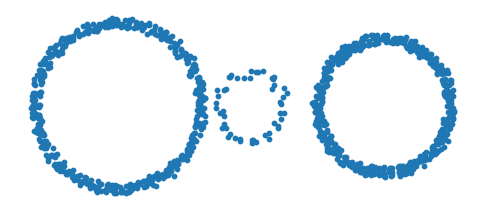

In [3]:
X = GeometryExamples.three_circles()

plt.figure(figsize=(6,3))
plt.scatter(X[:,0],X[:,1], s = 10)
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

Here, we display the persistence diagram for various choices of the <tt>n_landmarks</tt> parameter.
We see that, when <tt>n_landmarks</tt> is too small, the persistence diagram does not reflect the topology of the data well, and only when the parameter gets to about $50$ we start seeing the three classes clearly.

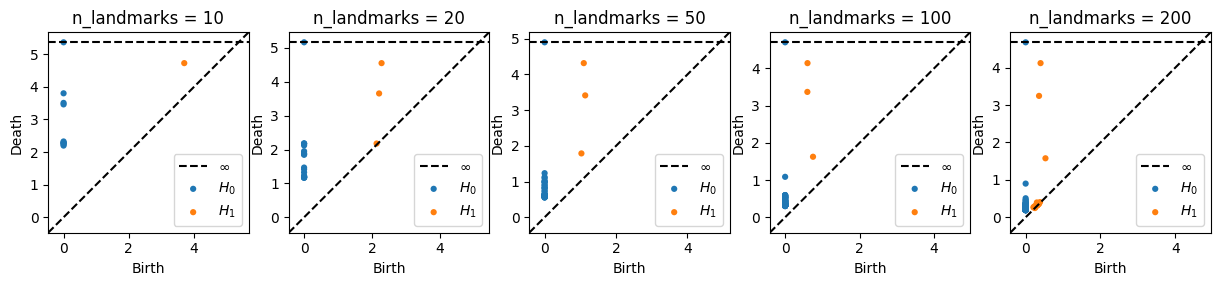

In [4]:
n_landmarks_choices = [10, 20, 50, 100, 200]

plt.figure(figsize=(15,5))
for i,n_landmarks in enumerate(n_landmarks_choices):
    cc = CircularCoords(X, n_landmarks=n_landmarks)
    plt.subplot(1, len(n_landmarks_choices), i+1)
    plot_diagrams(cc.dgms_, title="n_landmarks = " + str(n_landmarks))

We now fix <tt>n_landmarks</tt> $= 100$ and focus on the <tt>cocycle_idx</tt> parameter.

We display the output circular coordinates for the three clear choices for <tt>cocycle_idx</tt>: the most persistent class (<tt>cocycle_idx</tt> $=0$), the second most persistent class (<tt>cocycle_idx</tt> $=1$), and the third most persistent class (<tt>cocycle_idx</tt> $=2$).

We see that, in this case, the circular coordinates given by the algorithm reflect precisely the three circular features we see by directly looking at the data.

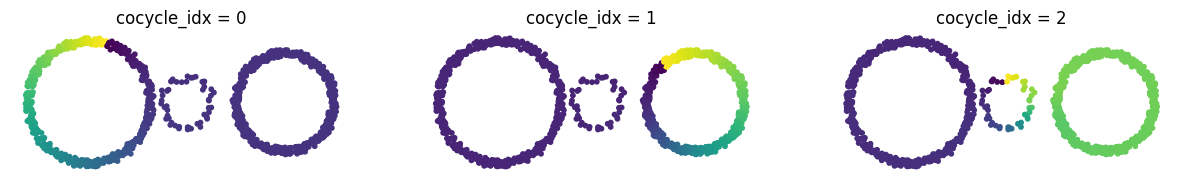

In [5]:
cc = CircularCoords(X, n_landmarks=100)

cocycle_idx_choices = [0,1,2]

plt.figure(figsize=(15,5))
for i,cocycle_idx in enumerate(cocycle_idx_choices):
    circular_coordinate = cc.get_coordinates(cocycle_idx=cocycle_idx)
    plt.subplot(1, len(cocycle_idx_choices), i+1)
    plt.scatter(X[:,0],X[:,1], s = 10, c = circular_coordinate)
    plt.title("cocycle_idx = " + str(cocycle_idx))
    plt.gca().set_aspect("equal") ; _ = plt.axis("off")